In [70]:
import re
from typing import List, Union, Tuple
from nltk.corpus import stopwords as stpwrds
from sklearn.model_selection import train_test_split
import time
from os.path import isfile
import numpy as np
# Webscraping
from bs4 import BeautifulSoup
from requests import get
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import nltk.sentiment
from importlib import reload

import os

import matplotlib.pyplot as plt
import json
from typing import Dict, List, Optional, Union, cast
import requests
import prepare as p
import explore as e
from nltk.tokenize.toktok import ToktokTokenizer
import matplotlib
from scipy import stats
import acquire as w

In [49]:
df = w.get_michelin_pages()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     6780 non-null   object 
 1   address                  6780 non-null   object 
 2   location                 6780 non-null   object 
 3   price                    6726 non-null   object 
 4   cuisine                  6780 non-null   object 
 5   longitude                6780 non-null   float64
 6   latitude                 6780 non-null   float64
 7   phone_number             6649 non-null   float64
 8   url                      6780 non-null   object 
 9   website_url              5542 non-null   object 
 10  award                    6780 non-null   object 
 11  facilities_and_services  6732 non-null   object 
 12  data                     6780 non-null   object 
dtypes: float64(3), object(10)
memory usage: 688.7+ KB


In [51]:
reload(p)
train, validate, test= p.prepare_michelin(df)

In [75]:
train.head()

,name,address,location,price,cuisine,longitude,latitude,url,award,facilities_and_services,data,price_level,city,country,clean,lemmatized,sentiment,word_count
6345,gasthaus ödenturm,"am ödenturm 11, cham, 93413, germany","cham, germany",€,"country cooking, mediterranean cuisine",12.703851,49.210919,https://guide.michelin.com/en/bayern/cham/rest...,bib gourmand,"car park,credit card / debit card accepted,gre...","as if straight out of a picture book, this bea...",1,cham,germany,straight picture book beautiful inn stands edg...,straight picture book beautiful inn stand edge...,0.9136,38
6427,weinhaus anker,"obertorstraße 13, marktheidenfeld, 97828, germany","marktheidenfeld, germany",€,"french, country cooking",9.600301,49.845621,https://guide.michelin.com/en/bayern/marktheid...,bib gourmand,"american express credit card,car park,credit c...",a restaurant that is steeped in tradition and ...,1,marktheidenfeld,germany,steeped tradition run great commitment lovely ...,steeped tradition run great commitment lovely ...,0.9186,35
5217,yang bao bao (nanzih),"106 chaoming road, nanzih district, kaohsiung,...","kaohsiung, taipei & taichung",$,dumplings,120.328050,22.724160,https://guide.michelin.com/en/kaohsiung-region...,bib gourmand,"air conditioning,car park,cash only","in 1993, this dumpling shop began life as a st...",1,kaohsiung,taipei & taichung,1993 dumpling shop began life street stall loc...,1993 dumpling shop began life street stall loc...,0.6808,49
3858,le bistrot gastronómico,"temprado 12, castelló de la plana, 12002, spain","castelló de la plana, spain",€€,fusion,-0.037028,39.983588,https://guide.michelin.com/en/comunidad-valenc...,bib gourmand,"air conditioning,american express credit card,...","an unpretentious, friendly and informal restau...",2,castelló de la plana,spain,unpretentious friendly informal whose aim prov...,unpretentious friendly informal whose aim prov...,0.9607,49
124,fat duck,"high street, bray, sl6 2aq, united kingdom","bray, united kingdom",££££,creative,-0.701753,51.507858,https://guide.michelin.com/en/windsor-and-maid...,3 michelin stars,"air conditioning,american express credit card,...",this iconic restaurant celebrated its 25-year ...,4,bray,united kingdom,iconic celebrated 25year anniversary 2021 intr...,iconic celebrated 25year anniversary 2021 intr...,0.9774,40


In [53]:
def get_stats_ttest(df):
    '''Function returns statistical T test'''
    One_Star = df[df.award == '1 michelin star']
    Two_Star = df[df.award == '2 michelin stars']
    stat, pval = stats.levene(One_Star.sentiment,
                              Two_Star.sentiment)
    alpha = 0.05
    if pval < alpha:
        variance = False

    else:
        variance = True    
    t_stat, p_val = stats.ttest_ind(One_Star.sentiment,
                                    Two_Star.sentiment,
                                    equal_var=True, random_state=123)

    print(f't_stat= {t_stat}, p_value= {p_val/2}')
    print('-----------------------------------------------------------')
    if (p_val/2) < alpha:
        print(f'We reject the null Hypothesis')
    else:
        print(f'We fail to reject the null Hypothesis. There is no significant difference between the sentiment scores. ')

Is there significant difference in sentiment scores between 1 & 2 star awards?

In [54]:
get_stats_ttest(train)

t_stat= 0.4534080508004802, p_value= 0.3251547361749879
-----------------------------------------------------------
We fail to reject the null Hypothesis. There is no significant difference between the sentiment scores. 


In [141]:
def sentiment_scores_bar(train):
    
    dfg = train.groupby(['award'])['sentiment'].mean().sort_values(ascending= False)
#create a bar plot
    dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='',fontsize =20,color=['#040f0f','#0e3013','#656665','#289944'])
    
#  Hex Codes: #040f0f, #0e3013, #656665, #289944, #e8e8e9

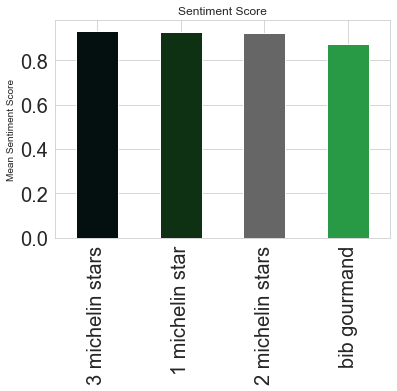

In [142]:
sentiment_scores_bar(train)

In [88]:
def sentiment_country(train):   
    dfg = train.groupby(['country'])['sentiment'].mean().sort_values(ascending= False)
    #create a bar plot
    dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='',fontsize =10, color=['#040f0f', '#0e3013', '#656665', '#289944', '#e8e8e9'])

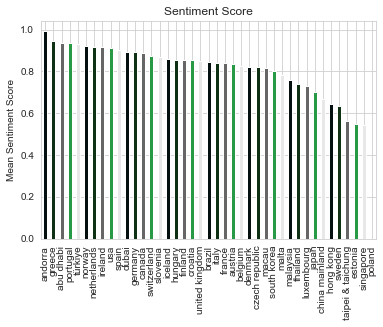

In [89]:
# top ten only
sentiment_country(train)

  #<b>Question 6.</b> Does higher rated restaurants have more facilities?
    which country has highest sentiment score?

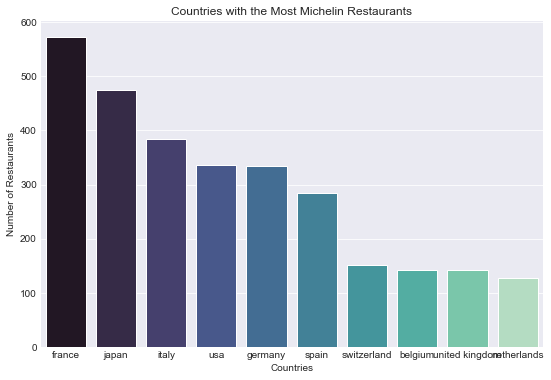

In [ ]:
e.top_10_country_viz(train)

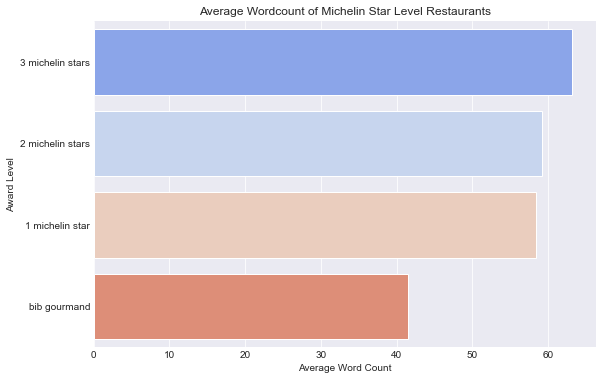

In [ ]:
e.get_wordcount_bar(train)

In [112]:
# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
np.random.seed(4)

In [113]:
X = train[['word_count', 'price_level']]

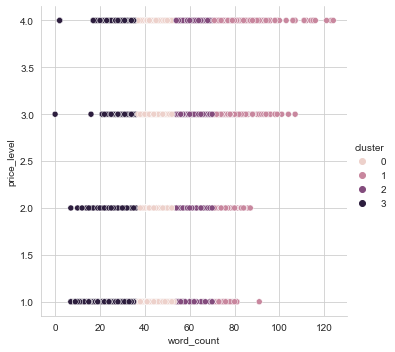

In [129]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)
sns.relplot(data=train, x='word_count', y='price_level', hue='cluster')

In [139]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scaler(train):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
  
    return train


def get_clusters(train):
    '''
    Takes in a dataframe and creates clusters based on a sample size
    '''
    train_scaled = min_max_scaler(train)
    # define features for clustering
    X_train_cluster = train_scaled[['price_level', 'word_count']]


    # define cluster object
    kmeans = KMeans(n_clusters=4, random_state = 333)
    # fit cluster object to features
    kmeans.fit(X_train_cluster)
    # use the object
    kmeans.predict(X_train_cluster)

    # add cluster features to train and X_train df's
    train_scaled['cluster'] = kmeans.predict(X_train_cluster)
 
    X_train_cluster['cluster'] = kmeans.predict(X_train_cluster)
    return train, train_scaled, X_train_cluster


def plot_clusters(X_train_cluster):
    '''
    Takes in an X_train_cluster and returns a 3d cluster plot
    '''
    fig = plt.figure(figsize = (14,14))
    ax = fig.add_subplot(111, projection = '3d')
    x = X_train_cluster.price_level
    y = X_train_cluster.word_count
    z = train.sentiment.mean()
    ax.scatter(x,y,z, c=X_train_cluster.cluster, s = 40, cmap = 'jet')
    # ax.legend()
    ax.set_xlabel('Price Level', fontsize = 15)
    ax.set_ylabel('Word Count',fontsize = 15)
    ax.set_zlabel('Sentiment',fontsize = 15)
    plt.title('Clusters by Price Level, Word Count, and Sentiment')
    return plt.show()


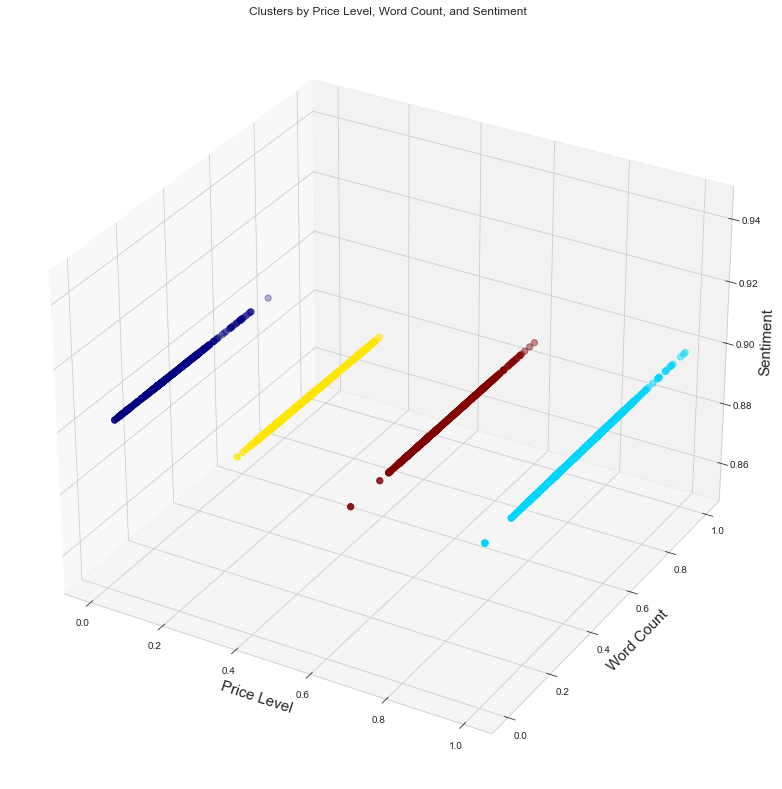

In [140]:
plot_clusters(X_train_cluster)

In [131]:
train = min_max_scaler(train)

In [134]:
train, train_scaled, X_train_cluster = get_clusters(train)

/var/folders/hb/h75yrttj2jx98ftlw744r4hm0000gn/T/ipykernel_76315/3171907551.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cluster['cluster'] = kmeans.predict(X_train_cluster)


In [122]:
train['cluster'] = kmeans.predict(X)


In [123]:
kmeans.cluster_centers_


array([[44.53255814,  2.38682171],
       [78.30079156,  3.176781  ],
       [62.56918688,  3.21968616],
       [28.15996169,  2.01724138]])

In [124]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,word_count,price_level
0,44.532558,2.386822
1,78.300792,3.176781
2,62.569187,3.219686
3,28.159962,2.017241


In [125]:
train.groupby('cluster')['word_count', 'price_level'].mean()


/var/folders/hb/h75yrttj2jx98ftlw744r4hm0000gn/T/ipykernel_76315/3784805884.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('cluster')['word_count', 'price_level'].mean()


,word_count,price_level
cluster,,
0,44.532558,2.386822
1,78.300792,3.176781
2,62.569187,3.219686
3,28.159962,2.017241


Text(0.5, 1.0, 'Visualizing Cluster Centers')

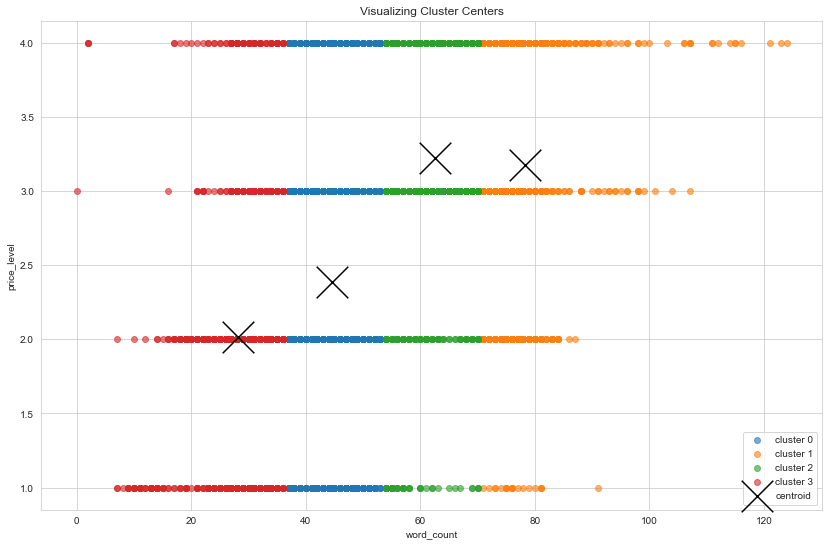

In [128]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.word_count, subset.price_level, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='price_level', x='word_count', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('word_count')
plt.ylabel('price_level')
plt.title('Visualizing Cluster Centers')


In [90]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np